In [2]:
import pandas as pd
import numpy as np
import pickle

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, adjusted_rand_score, silhouette_score, davies_bouldin_score
from sklearn.model_selection import GridSearchCV

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans, DBSCAN

# Visualization
from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('test_ML.csv')
y = data['close']
X = data.drop(['symbol', 'close'], axis=1)

In [4]:
categorical_cols = list(X.columns[X.dtypes == 'object'])
numerical_cols = list(X.columns[X.dtypes != 'object'])

In [6]:
# Definition of preprocessing steps

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('stdscaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=999))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [7]:
X_prep = preprocessor.fit_transform(X)

c:\Users\robin\anaconda3\envs\time_series\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\robin\anaconda3\envs\time_series\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\robin\anaconda3\envs\time_series\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\robin\anaconda3\envs\time_series\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a fu

# Regression

In [15]:
model = RandomForestRegressor()
model.fit(X_prep, y)

c:\Users\robin\anaconda3\envs\time_series\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\robin\anaconda3\envs\time_series\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


RandomForestRegressor()

In [46]:
predictions = model.predict(X_prep)

In [ ]:
def select_predictions(compare):
    if compare['predictions_initiales'] < compare['max_negative']:
        return compare['max_negative']
    elif compare['predictions_initiales'] > compare['max_positive']:
        return compare['max_positive']
    else:
        return compare['predictions_initiales']

In [49]:
def modify_predictions(predictions, y, min_pred=0, max_diff=0.8):

    modified_predictions = predictions.copy()

    compare = pd.DataFrame(data=y)
    compare['predictions_initiales'] = predictions
    compare['absolute_differencial'] = compare['close'] - compare['predictions_initiales']
    compare['relative_differencial'] = compare['absolute_differencial'] / compare['close']

    # Define upper and lower limits
    compare['max_positive'] = compare['close'] * (1 + max_diff)
    compare['max_negative'] = compare['close'] * (1 - max_diff)

    compare['predictions_finales'] = compare.apply(lambda x: select_predictions(x), axis=1)

    return compare['predictions_finales'].values

In [51]:
r2 = r2_score(y, predictions)
MSE = mean_squared_error(y, predictions)
RMSE = mean_squared_error(y, predictions, squared=False)
MAE = mean_absolute_error(y, predictions)

c:\Users\robin\anaconda3\envs\time_series\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\robin\anaconda3\envs\time_series\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\robin\anaconda3\envs\time_series\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\robin\anaconda3\envs\time_series\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

In [52]:
print("r2 : {}".format(r2))
print("MSE : {}".format(MSE))
print("RMSE : {}".format(RMSE))
print("MAE : {}".format(MAE))

r2 : 0.9051240479000515
MSE : 12134.944597470663
RMSE : 110.15872456356175
MAE : 39.42040794621621


c:\Users\robin\anaconda3\envs\time_series\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\robin\anaconda3\envs\time_series\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\robin\anaconda3\envs\time_series\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


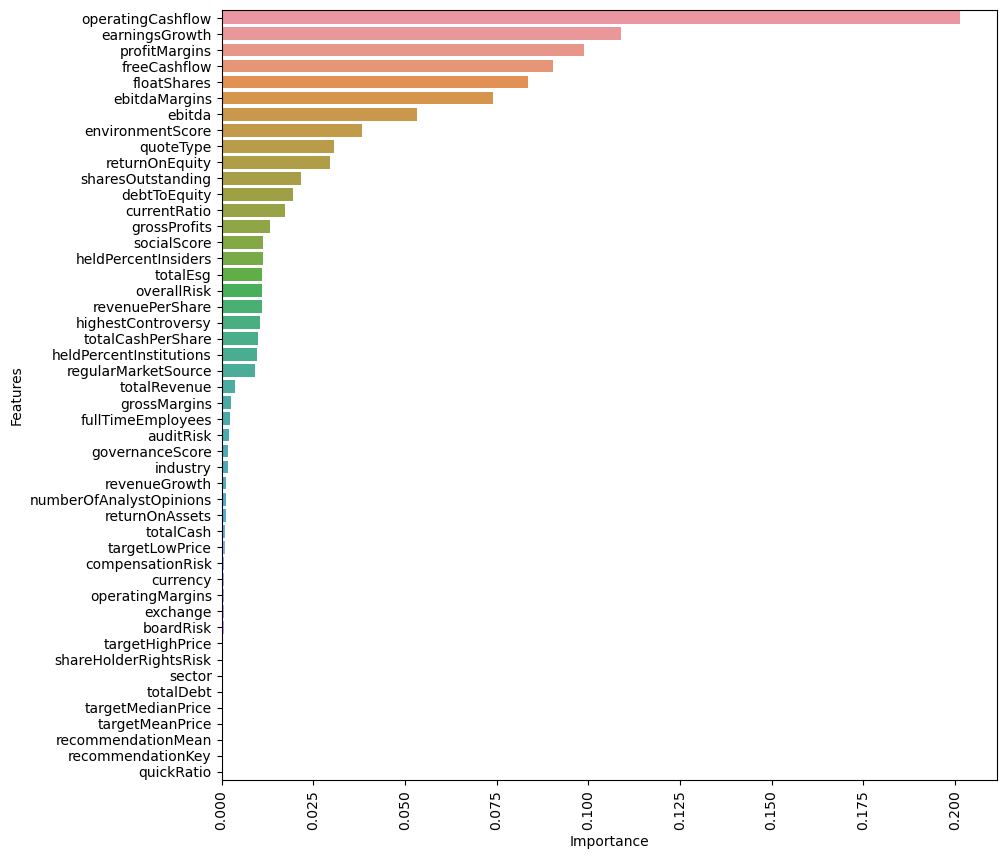

In [18]:
# Plot feature importance
feature_list = list(X.columns)

feat_importance = model.feature_importances_

feat_df = pd.DataFrame({'Features' : feature_list, 'Importance' : feat_importance})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,10))
sns.barplot(data=feat_df, x='Importance', y='Features')
plt.xticks(rotation=90)
plt.show()

In [54]:
# Save model and preprocessor

pickle.dump(preprocessor, open('./test_preprocessor.pkl', 'wb'))
pickle.dump(model, open('./test_model.pkl', 'wb'))

# Clustering

In [8]:
def test_KMeans(k_clusters:range, X):
    """Function which tests values in k_clusters for a KMeans (KMeans++ with one iteration) and displays inertia, 
    davies bouldin and silhouettes scores. X must be processed"""
    
    inertia_scores = []
    silhouette_scores = []
    davies_bouldin_scores = []
    
    for k in k_clusters:
    
        model = KMeans(n_clusters=k, random_state=0)
        model.fit(X)

        inertia_scores.append(-model.score(X))
        silhouette_scores.append(silhouette_score(X, model.labels_))
        davies_bouldin_scores.append(davies_bouldin_score(X, model.labels_))
        
    
    plt.figure(figsize=(19,5))
    
    plt.subplot(1,3,1)
    plt.plot(k_clusters, inertia_scores)
    plt.xlabel('number of clusters')
    plt.title('inertia score')
    
    plt.subplot(1,3,2)
    plt.plot(k_clusters, silhouette_scores)
    plt.xlabel('number of clusters')
    plt.title('silhouette score')
    
    plt.subplot(1,3,3)
    plt.plot(k_clusters, davies_bouldin_scores)
    plt.xlabel('number of clusters')
    plt.title('davies bouldin score')

    return pd.DataFrame({'K' : [i for i in k_clusters], 'inertia_scores' : inertia_scores, 
                         'silhouette_scores' : silhouette_scores, 'davies_bouldin_scores' : davies_bouldin_scores})

c:\Users\robin\anaconda3\envs\time_series\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\robin\anaconda3\envs\time_series\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\robin\anaconda3\envs\time_series\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\robin\anaconda3\envs\time_series\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

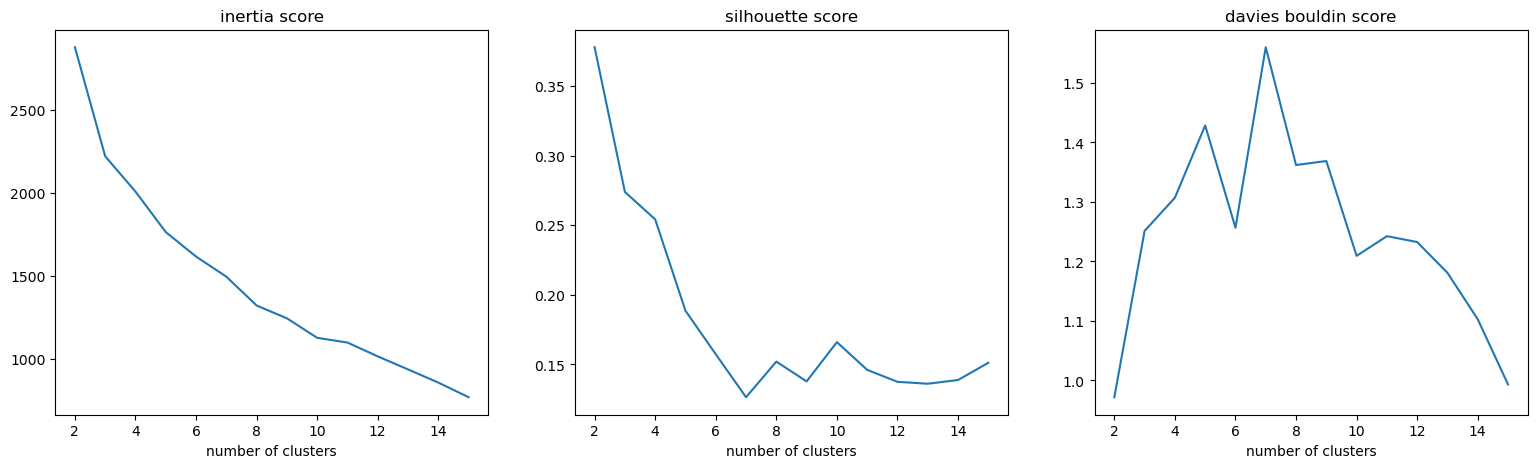

In [9]:
simplified_KMeans = test_KMeans(range(2,16), X_prep)

In [10]:
KMeans_model = KMeans(n_clusters=5, random_state=0)
KMeans_model.fit(X_prep)

c:\Users\robin\anaconda3\envs\time_series\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\robin\anaconda3\envs\time_series\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [11]:
KMeans_model.labels_

array([2, 4, 2, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 4, 0, 2, 2, 3, 0, 3, 2,
       4, 3, 4, 2, 2, 3, 2, 2, 0, 0, 1, 4, 4, 1, 4, 1, 1, 2, 2, 1])

In [12]:
KMeans_results = pd.DataFrame(data['symbol'])
KMeans_results['cluster'] = KMeans_model.labels_

In [26]:
KMeans_model.predict(X_prep)

array([2, 4, 2, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 4, 0, 2, 2, 3, 0, 3, 2,
       4, 3, 4, 2, 2, 3, 2, 2, 0, 0, 1, 4, 4, 1, 4, 1, 1, 2, 2, 1])

In [16]:
multiples['cluster'] = KMeans_model.labels_

In [20]:
mean_cluster_multiples, cluster_peers = peers_valuation("cluster", financials, multiples, last_valuations, stock_price)

C:\Users\robin\AppData\Local\Temp\ipykernel_24264\3020649703.py:116: RuntimeWarning: Mean of empty slice
  peers[f'PeersMeanStockPrice{capitalized_groupby_col}'] = peers.apply(lambda x: np.nanmean([x[f'stockPriceBook{capitalized_groupby_col}'], x[f'stockPriceRevenue{capitalized_groupby_col}'], x[f'stockPriceEbitda{capitalized_groupby_col}'], x[f'stockPriceEarnings{capitalized_groupby_col}']]), axis=1)
c:\Users\robin\anaconda3\envs\time_series\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\robin\AppData\Local\Temp\ipykernel_24264\3020649703.py:58: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(values)


In [24]:
cluster_peers.head()

,symbol,date,BridgeEnterpriseValueMarketCap,marketCapRevenueCluster,marketCapEbitdaCluster,marketCapEarningsCluster,marketCapBookCluster,stockPriceRevenueCluster,stockPriceEbitdaCluster,stockPriceEarningsCluster,stockPriceBookCluster,PeersMeanStockPriceCluster,PeersRelativeStdStockPriceCluster,PeersAbsoluteDiffCluster,PeersRelativeDiffCluster,PeersConfidenceCluster
0,ACA.PA,2024-05-03,-3.168839e+11,2.723389e+11,NaN,1.097808e+11,1.587971e+11,90.023440,NaN,36.288773,52.491424,59.601212,0.377606,44.831212,3.035288,Medium
1,AIR.PA,2024-05-03,-2.923102e+09,-1.197813e+11,7.849845e+10,6.123127e+10,4.577115e+10,-151.766729,99.460055,77.581987,57.993513,20.817207,4.838076,-133.522790,-0.865121,Low
2,BNP.PA,2024-05-03,-4.750943e+11,3.949720e+11,NaN,1.506917e+11,3.095368e+11,349.282399,NaN,133.259926,273.730177,252.090834,0.355064,184.450835,2.726949,Medium
3,GLE.PA,2024-05-03,-3.729384e+11,3.285171e+11,NaN,3.895672e+10,1.637782e+11,412.583416,NaN,48.925612,205.688505,222.399178,0.669661,197.944178,8.094221,Low
4,HO.PA,2024-05-03,4.201230e+09,-3.819828e+10,2.452655e+10,1.599164e+10,1.690512e+10,-185.911364,119.370949,77.831470,82.277394,23.392112,5.211709,-137.657891,-0.854752,Low


In [25]:
pickle.dump(KMeans_model, open('./test_clustering.pkl', 'wb'))